# **Lab 06: Polynomial Regression**
- Author: HabibUllah<br><br>
 <i>Student of Computer Engineering Dept, UET Taxila</i>
 <br><br>
- Email: 22-CP-62@students.uettaxila.edu.pk
---
## Objective: 
This lab aims to understand and implement Polynomial Regression, an extension of 
linear regression that models the relationship between independent and dependent 
variables as an nth-degree polynomial. You will:
1. Learn the mathematical formulation of Polynomial Regression.
2. Explore a dataset to understand its trends.
3. Implement Polynomial Regression using Python.
4. Compare Polynomial Regression with Linear Regression to evaluate performance.
Prerequisites:
- Python Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn.
- Conceptual Understanding: Linear Regression, polynomial equations, basic machine 
learning principles, and visualization.

---

## Equation of Polynomial Regression:
``` The general equation for Polynomial Regression is:
𝑦 = 𝛽0 + 𝛽1𝑥 + 𝛽2𝑥^2 + 𝛽3𝑥^3 + ⋯ + 𝛽𝑛𝑥^𝑛
 y: Dependent variable
 x: Independent variable
 β0,β1,β2,…,βn: Coefficients
 n: Degree of the polynomial
In Polynomial Regression, the coefficients β are determined using least squares or maximum 
likelihood estimation. The degree n determines the complexity of the model. 


---
## Step 1: Import Required Libraries



In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

---
## Step 2: Load the Dataset


In [17]:
# Load dataset 
df_sal = pd.read_csv('Position_Salaries.csv') 
df_sal.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


---
## Step 3: Data Analysis


C:\Users\HB\AppData\Local\Temp\ipykernel_8684\3011584567.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


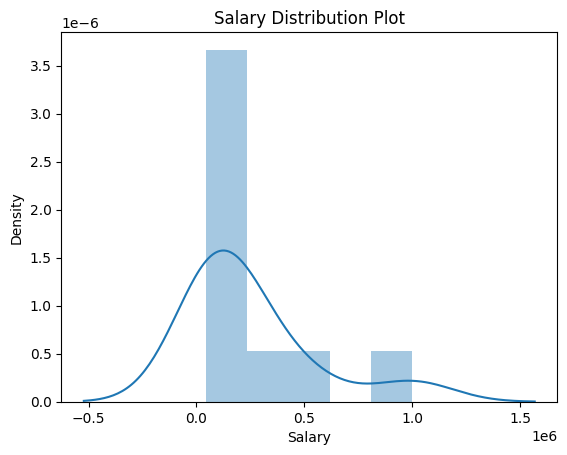

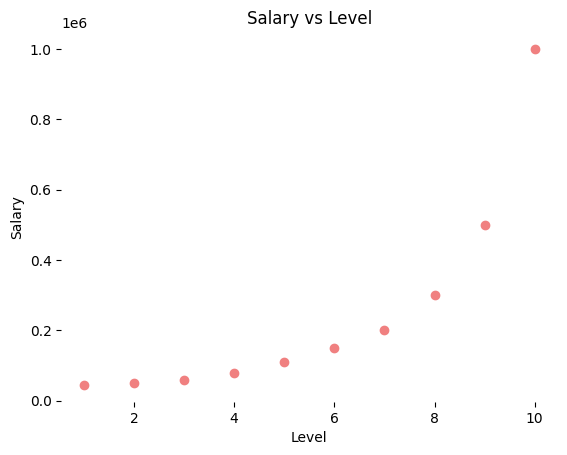

In [18]:
# Describe data 
df_sal.describe()
# Salary distribution 
plt.title('Salary Distribution Plot') 
sns.distplot(df_sal['Salary']) 
plt.show() 
# Scatter plot 
plt.scatter(df_sal['Level'], df_sal['Salary'], color='lightcoral') 
plt.title('Salary vs Level') 
plt.xlabel('Level') 
plt.ylabel('Salary') 
plt.box(False) 
plt.show() 

---
## Step 4: Split the Dataset into Independent and Dependent Variables


In [19]:
# Splitting into independent (X) and dependent (y) variables 
X = df_sal.iloc[:, 1:-1].values # Independent variable 
y = df_sal.iloc[:, -1].values # Dependent variable 

---
## Step 5: Train the Regression Models
### Linear Regression Model:


In [20]:
# Train linear regression model 
lr = LinearRegression() 
lr.fit(X, y) 


LinearRegression()

### Polynomial Regression Model:

In [30]:
# Train polynomial regression model 
pr = PolynomialFeatures(degree=4) # Degree of polynomial 
X_poly = pr.fit_transform(X) 
lr_2 = LinearRegression() 
lr_2.fit(X_poly, y)

LinearRegression()

---
## Step 6: Predict the Results 

In [31]:
# Predict using linear regression 
y_pred_lr = lr.predict(X) 
# Predict using polynomial regression 
y_pred_poly = lr_2.predict(X_poly)

---
## Step 7: Visualization of Predictions

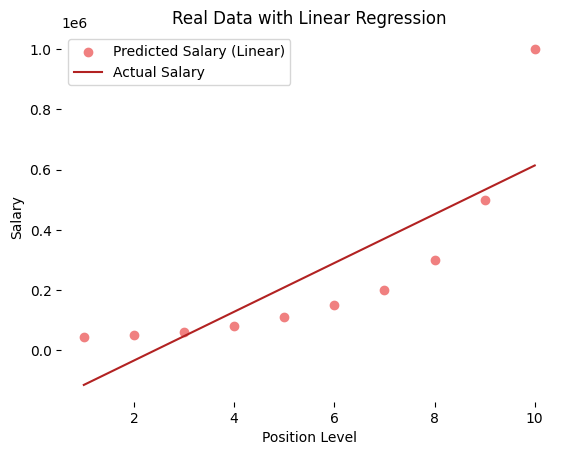

In [32]:
plt.scatter(X, y, color='lightcoral') 
plt.plot(X, lr.predict(X), color='firebrick') 
plt.title('Real Data with Linear Regression') 
plt.xlabel('Position Level') 
plt.ylabel('Salary') 
plt.legend(['Predicted Salary (Linear)', 'Actual Salary'], loc='best', facecolor='white') 
plt.box(False) 
plt.show() 

---
## Polynomial Regression:


C:\Users\HB\AppData\Local\Temp\ipykernel_8684\2374103465.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


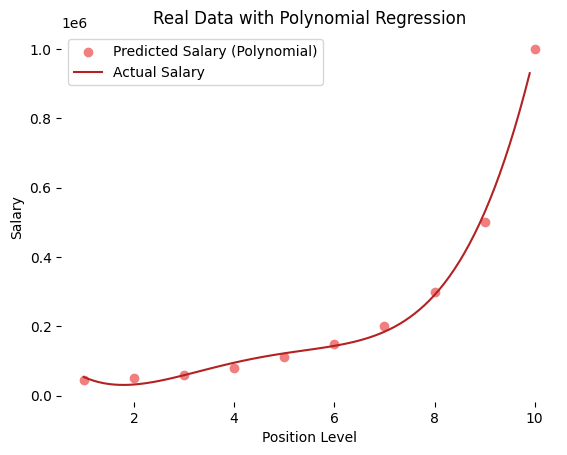

In [33]:
# Finer grid for smooth curve 
X_grid = np.arange(min(X), max(X), 0.1) 
X_grid = X_grid.reshape((len(X_grid), 1)) 
# Plot polynomial regression 
plt.scatter(X, y, color='lightcoral') 
plt.plot(X_grid, lr_2.predict(pr.fit_transform(X_grid)), color='firebrick') 
plt.title('Real Data with Polynomial Regression') 
plt.xlabel('Position Level') 
plt.ylabel('Salary') 
plt.legend(['Predicted Salary (Polynomial)', 'Actual Salary'], loc='best', facecolor='white') 
plt.box(False) 
plt.show() 

---
## Step 8: Test Predictions with Specific Input
Let’s check the prediction for Level = 7.5 using both models:

In [34]:
# Predict with Linear Regression 
print(f'Linear Regression Prediction for Level 7.5: {lr.predict([[7.5]])}') 
# Predict with Polynomial Regression 
print(f'Polynomial Regression Prediction for Level 7.5: {lr_2.predict(pr.fit_transform([[7.5]]))}') 

Linear Regression Prediction for Level 7.5: [411257.57575758]
Polynomial Regression Prediction for Level 7.5: [225126.29297787]


---
# **Lab Tasks:**
## **Task 1: Visualize the dataset using scatter plots and regression lines to compareLinear Regression and Polynomial Regression (degree = 4).**

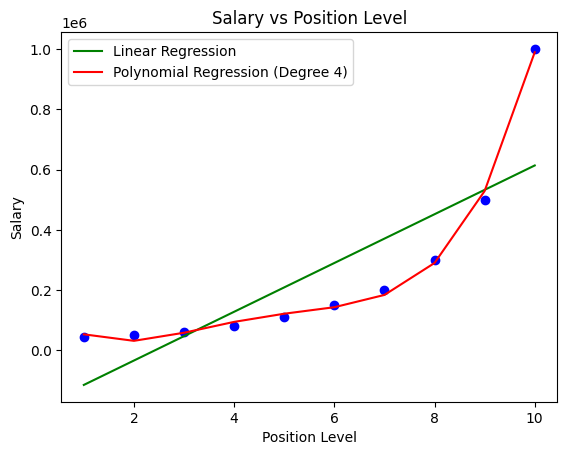

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Polynomial Regression (degree=4)
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Visualize
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(X), color='green', label='Linear Regression')
plt.plot(X, poly_reg.predict(X_poly), color='red', label='Polynomial Regression (Degree 4)')
plt.title('Salary vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

---
## **Task 2: Train and evaluate Polynomial Regression models with degrees 2, 3, and 5. Compare their R-squared scores to identify the best-fitting model.**

C:\Users\HB\AppData\Local\Temp\ipykernel_8684\32646604.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)


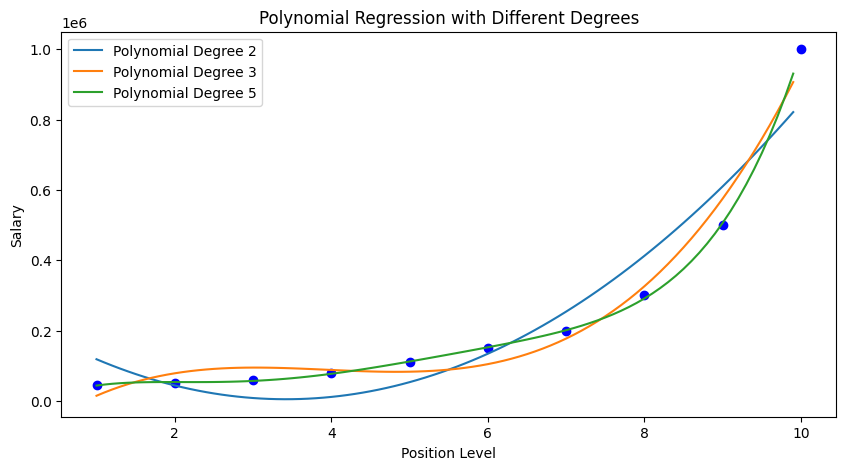

R-squared scores for different degrees: {2: 0.9162082221443942, 3: 0.9812097727913366, 5: 0.9997969027099755}
Best-fitting model: Degree 5


In [41]:
from sklearn.metrics import r2_score
plt.figure(figsize=(10, 5))
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)
for degree in [2, 3, 5]:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    plt.plot(X_grid, poly_reg.predict(poly_features.transform(X_grid)), label=f'Polynomial Degree {degree}')

plt.scatter(X, y, color='blue')
plt.title('Polynomial Regression with Different Degrees')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

r2_scores = {}
for degree in [2, 3, 5]:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred = poly_reg.predict(X_poly)
    r2_scores[degree] = r2_score(y, y_pred)

print("R-squared scores for different degrees:", r2_scores)
# Identify best degree
best_degree = max(r2_scores, key=r2_scores.get)
print("Best-fitting model: Degree", best_degree)

---
## **Task 3: Implement and plot predictions for Polynomial Regression with Ridge regularization (degree = 4).**


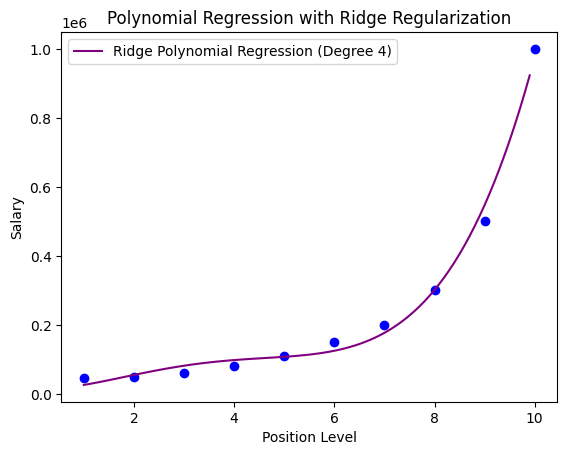

In [43]:
from sklearn.linear_model import Ridge

# Polynomial Features (degree=4)
poly_features_4 = PolynomialFeatures(degree=4)
X_poly_4 = poly_features_4.fit_transform(X)
# Ridge Regression with alpha=1.0
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_poly_4, y)

# Plotting Ridge Regression (degree=4)
plt.scatter(X, y, color='blue')
plt.plot(X_grid, ridge_reg.predict(poly_features_4.transform(X_grid)), color='purple', label='Ridge Polynomial Regression (Degree 4)')
plt.title('Polynomial Regression with Ridge Regularization')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()


---
## **Task 4: Calculate and compare Mean Absolute Error (MAE) and Mean Squared Error (MSE) for both Linear and Polynomial Regression models.**


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Linear Regression Errors
lin_mae = mean_absolute_error(y, lin_reg.predict(X))
lin_mse = mean_squared_error(y, lin_reg.predict(X))

# Polynomial Regression Errors
poly_mae = mean_absolute_error(y, poly_reg.predict(X_poly))
poly_mse = mean_squared_error(y, poly_reg.predict(X_poly))

print("Linear Regression - MAE:", lin_mae, "MSE:", lin_mse)
print("Polynomial Regression - MAE:", poly_mae, "MSE:", poly_mse)

Linear Regression - MAE: 128454.54545454546 MSE: 26695878787.878784
Polynomial Regression - MAE: 3360.83916091242 MSE: 16382284.38228488


---
## **Task 5: Use the trained Polynomial Regression model to predict salaries for Levels 6.5, 8.0, and 9.0. Visualize these predictions on the original dataset plot.**

Predictions for levels 6.5, 8.0, 9.0: [174878.07765173 291571.09557057 506617.71561662]


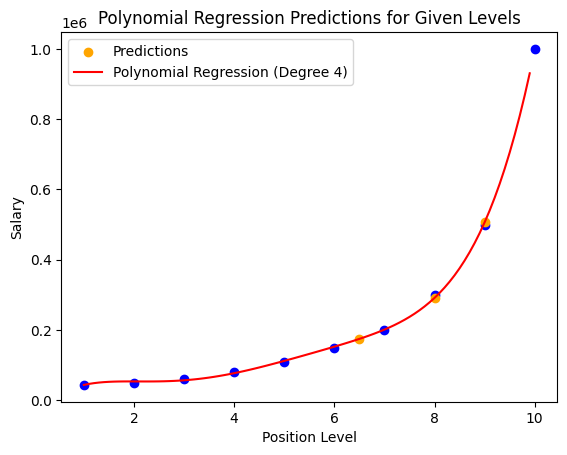

In [45]:
# Predictions for Levels 6.5, 8.0, and 9.0
levels = np.array([6.5, 8.0, 9.0]).reshape(-1, 1)
level_preds = poly_reg.predict(poly_features.transform(levels))
print("Predictions for levels 6.5, 8.0, 9.0:", level_preds)

# Visualize predictions
plt.scatter(X, y, color='blue')
plt.scatter(levels, level_preds, color='orange', label='Predictions')
plt.plot(X_grid, poly_reg.predict(poly_features.transform(X_grid)), color='red', label='Polynomial Regression (Degree 4)')
plt.title('Polynomial Regression Predictions for Given Levels')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

**ThankYou**